# Tag analysis
We are going to have a look at the tags used in our [60,000 questions from StackOverflow with Quality Rating](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate). It should give us a better understanding of the situation and, with a bit of work, we might already be able to spot some trends.

## Introduction
In this article, we want to do a few things using the `Tags` field. We want to have a look at what the bulk of the questions are about but we also want to see if there are some common combinations. All this will eventually be confronted to the quality of the post to try and identify trends.

To that end, we are going to use the `lambda` function, build cleaning functions, build a bag of words, create a wordcloud and use nltk's `FreqDist`.

## Imports and cleaning functions
Nothing too fancy with the cleaning functions but the one we are going to use for our wordclouds is a little more invasive to try and get rid of some noise.

In [2]:
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (30,30)

df = pd.read_csv('data/processed/data.csv', index_col='Id')

In [3]:
def wc(text):
    """
    Cleaning function to be used with our first wordcloud
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('-','')
        tags = tags.replace('.','DOT')
        tags = tags.replace('c++','Cpp')
        tags = tags.replace('c#','Csharp')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'
    
def clean_tags(text):
    """
    Cleaning function for tags
    """
    
    if text:
        tags = text.replace('><',' ')
        tags = tags.replace('>','')
        return tags.replace('<','')
    else:
        return 'None'

## Wordclouds
`wordcloud()` needs a document of space-separated words. We are going to create a list of words then use the `' '.join()` method to build that document.

In [4]:
tags = [tag for i in df['Tags'].apply(lambda x: wc(x)) for tag in i.split()]

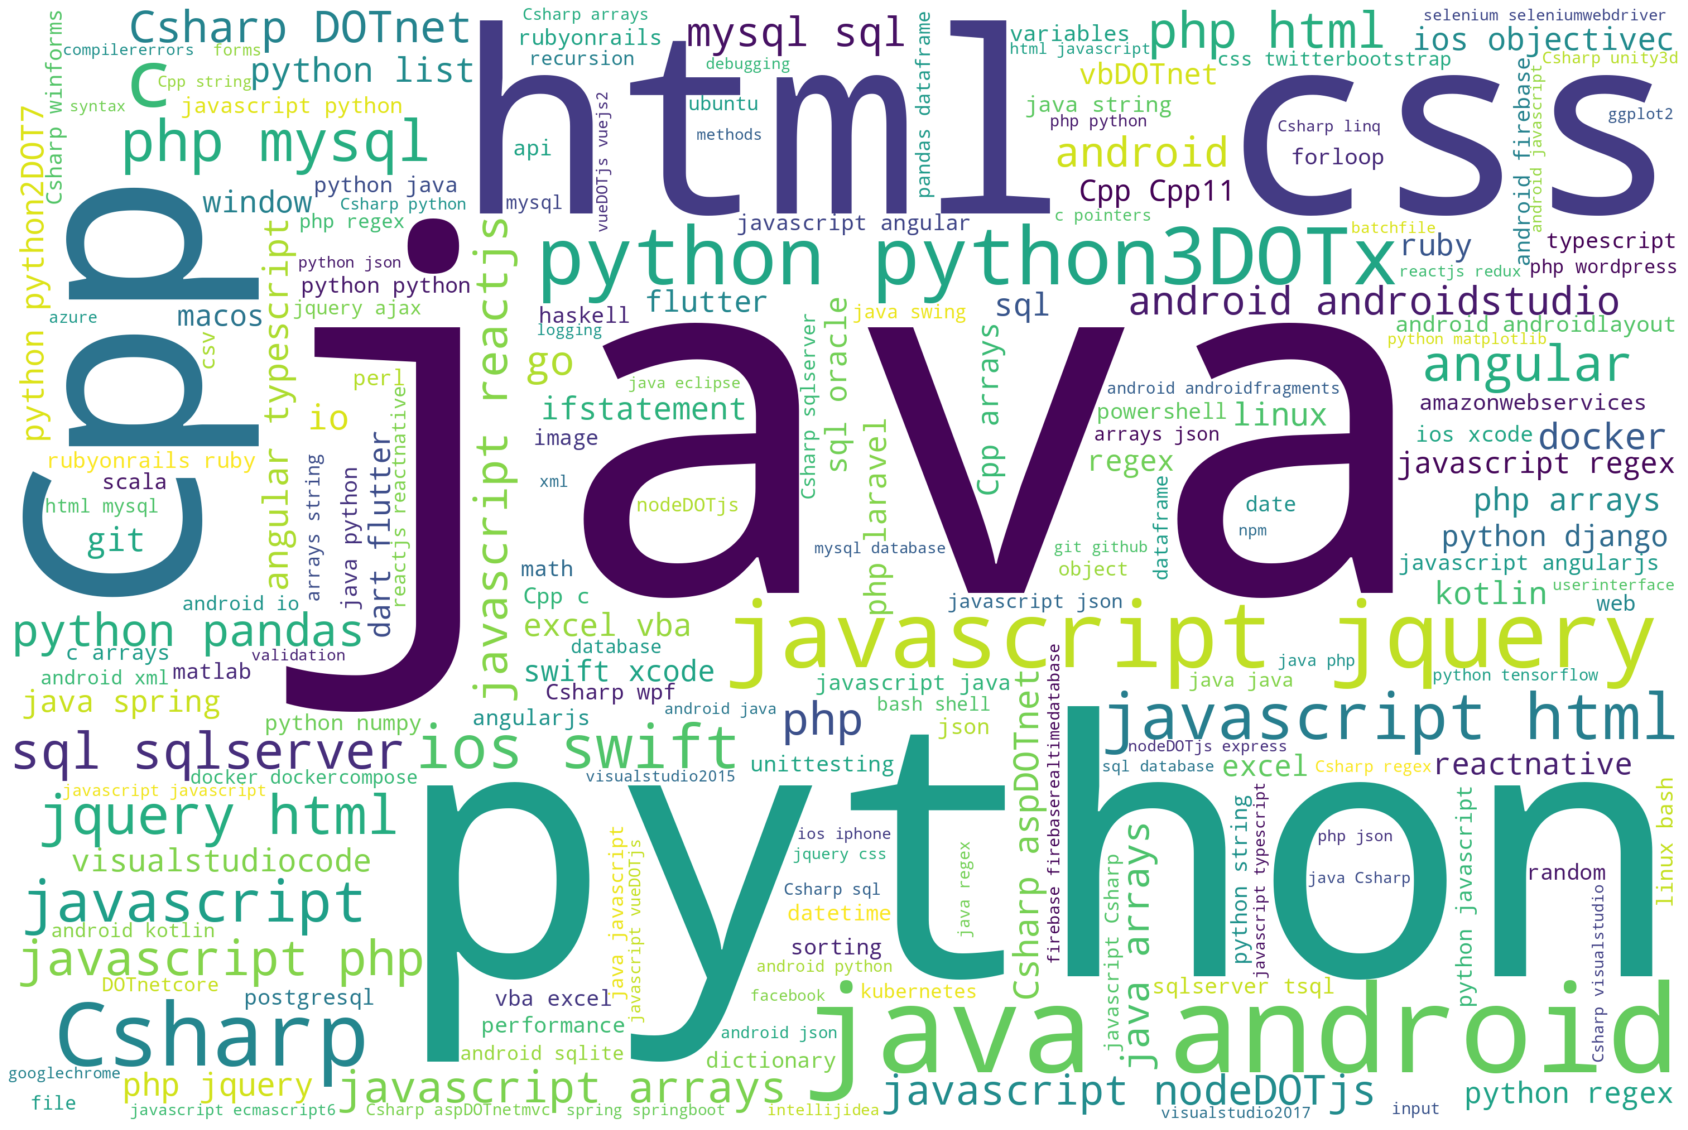

In [5]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
list(wordcloud.words_)[:20]

['java',
 'python',
 'html css',
 'Cpp',
 'java android',
 'javascript jquery',
 'Csharp',
 'c',
 'python python3DOTx',
 'javascript html',
 'ios swift',
 'javascript',
 'php mysql',
 'jquery html',
 'sql sqlserver',
 'angular',
 'php html',
 'javascript php',
 'javascript reactjs',
 'php']

We can see that although our list only contained single words, `wordcloud()` recognises some commonly paired ones.

A few things worth noticing as well:
- `java` and `python` seem to be the most asked about language, followed by `html css`.
- `javascript` seems to be quite high up as well but has been paired with other technologies like `html`,`jquery`, etc.
- Talking about pairs, we can already spot a few meaningful ones such as `java android` or less valuable like `python python 3.x`.

Let's look at the actual counts to see in which proportion those languages are talked about.

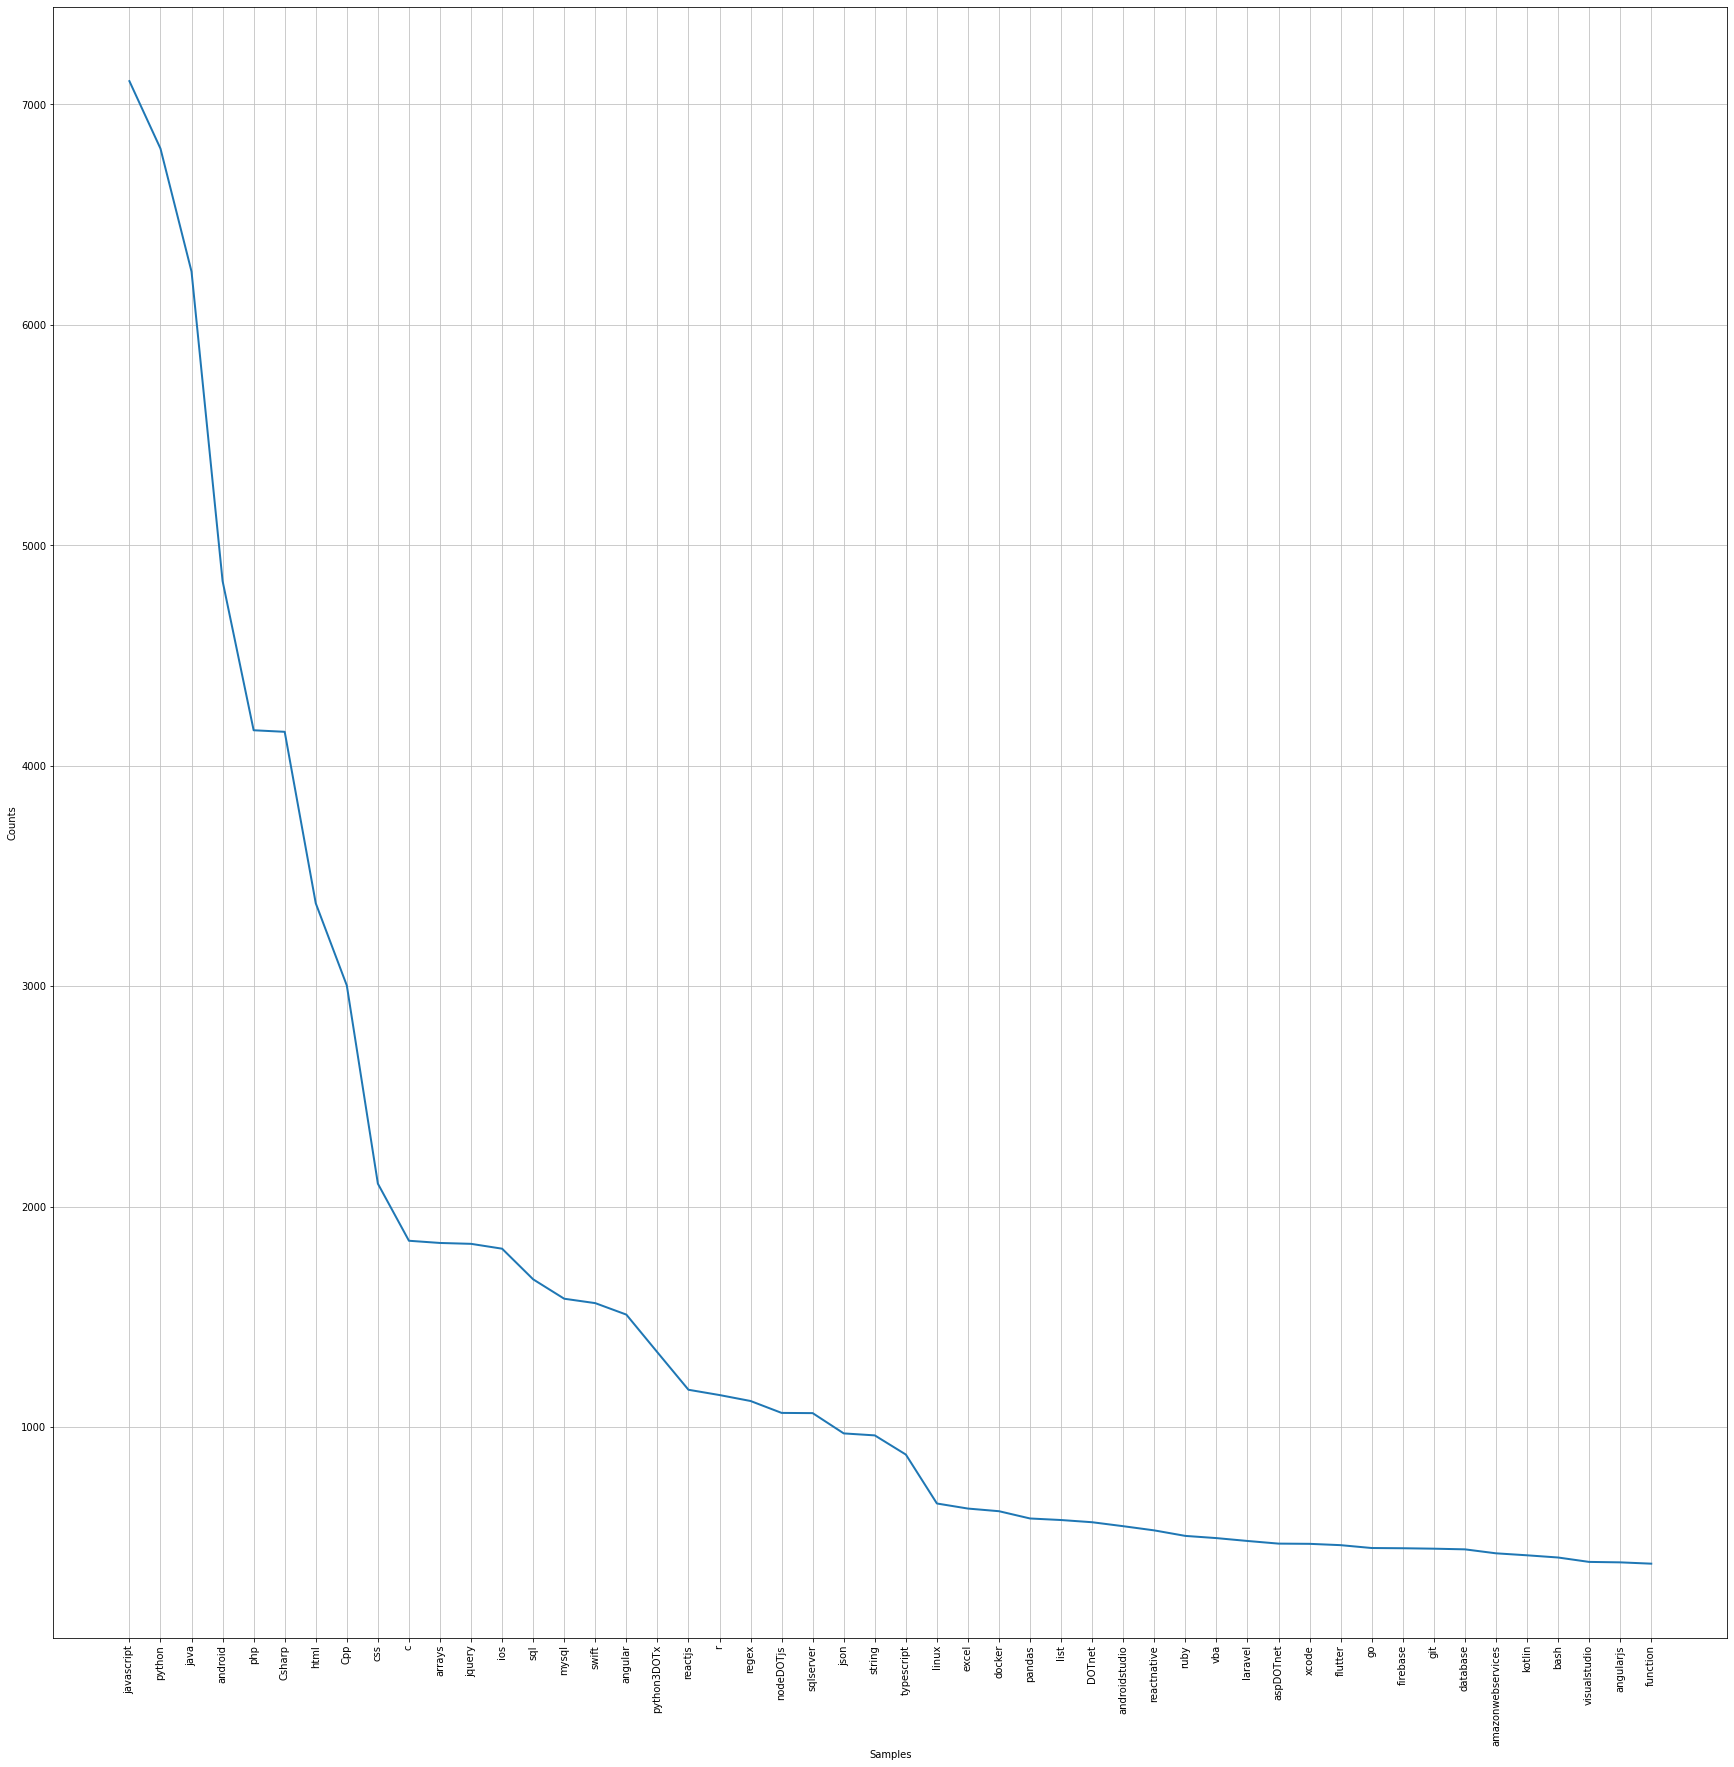

In [7]:
FreqDist(tags).plot(50)
plt.show()

It seems our assumption was correct, `javascript` is the most asked about language. But then `pyhon` overtakes `java` by a couple of hundred questions.

Let's double check this by reducing the list of tags to the first one only. We will assume programmers know how to tag a post, with the first tag being the core of the question, followed by other tags giving more context about the question.

In [8]:
first_tags = df['Tags'].apply(lambda x: wc(x)).apply(lambda x: x.split()[0])

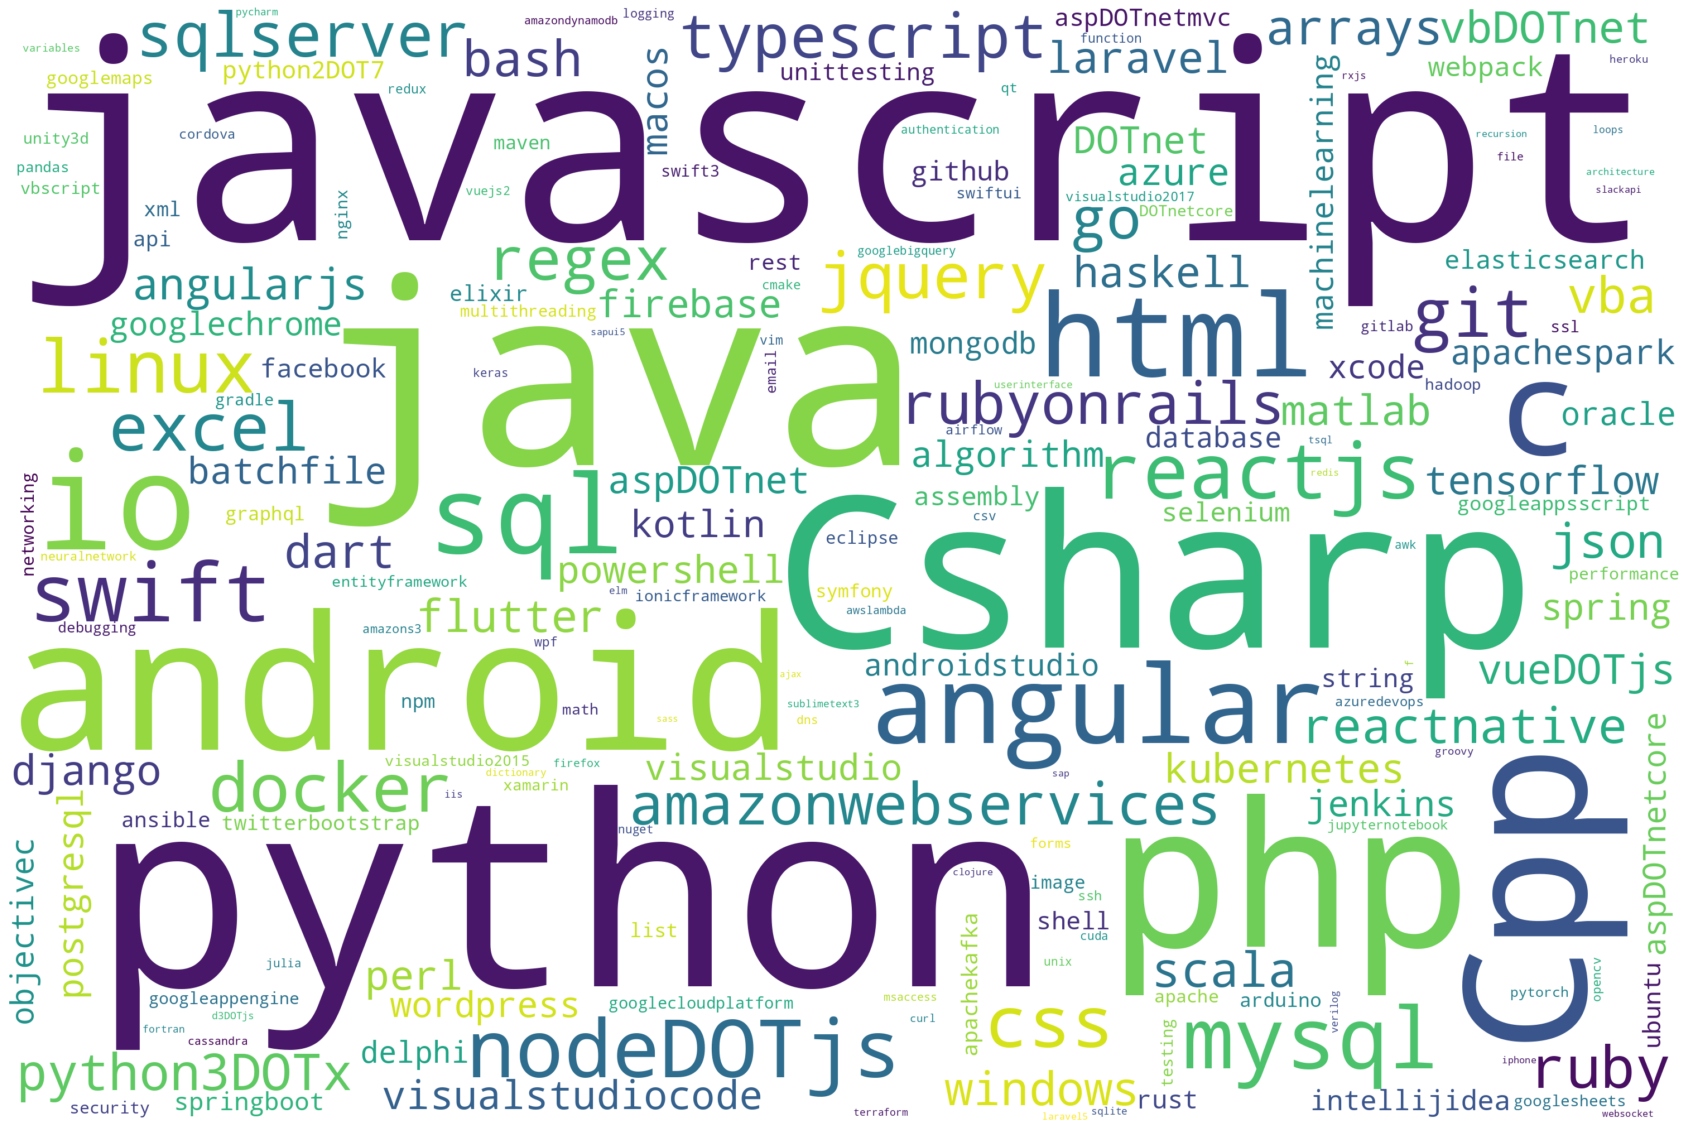

In [9]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      regexp = '\w+', # Allows C, R to be parsed as words
                      background_color = 'white'
                     )

wordcloud.generate(" ".join(first_tags))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
list(wordcloud.words_)[:20]

['javascript',
 'python',
 'java',
 'Csharp',
 'php',
 'android',
 'Cpp',
 'io',
 'c',
 'html',
 'sql',
 'angular',
 'mysql',
 'swift',
 'nodeDOTjs',
 'reactjs',
 'linux',
 'css',
 'docker',
 'git']

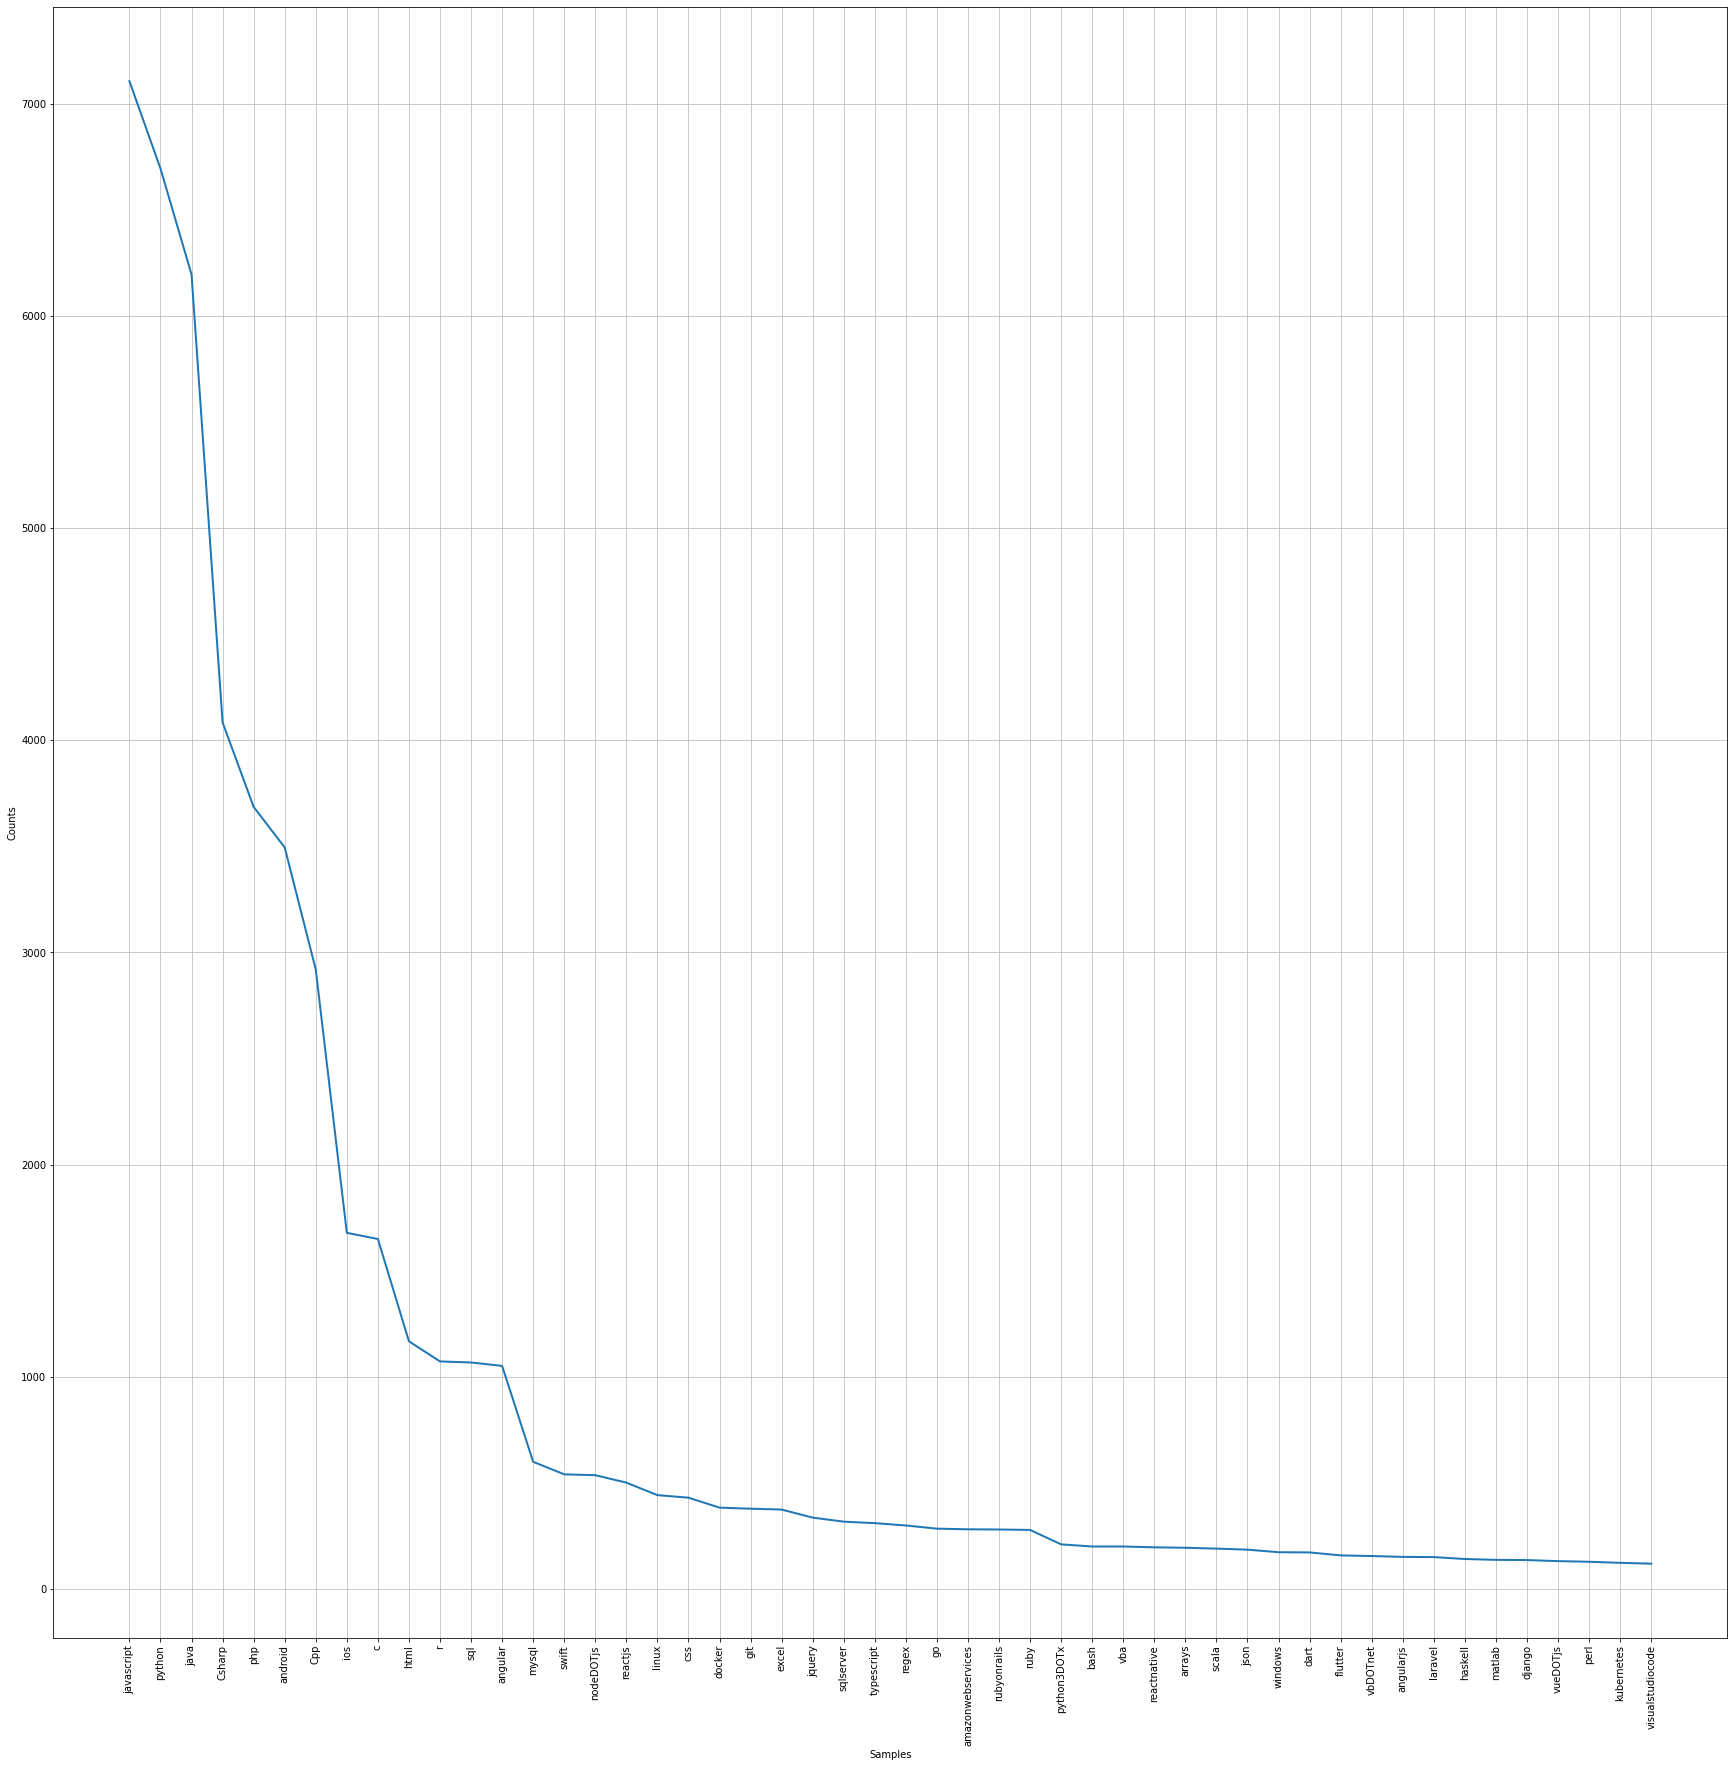

In [11]:
FreqDist(first_tags).plot(50)
plt.show()

So most questions on SO are about `javascript`, `python`, `java` and `c#`.

Let's have a deeper look at the top languages by taking a bag of words approach.
### Javascript

In [12]:
bag = {}
for tag in df['Tags'].apply(lambda x: clean_tags(x)):
    # Get the previous entry, or 0 if not yet documented; add 1
    bag[tag] = bag.get(tag, 0) + 1 

In [13]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'javascript' in words:
        print(words, bag[words])

javascript 879
javascript jquery 348
javascript html 260
javascript jquery html 156
javascript html css 148
javascript jquery html css 116
javascript arrays 114
javascript reactjs 113
javascript regex 111
javascript php 55
javascript node.js 54
javascript angularjs 52
javascript json 50
javascript php html 48
javascript ecmascript-6 45
javascript angular 34
javascript typescript 34
javascript css 33
javascript jquery css 28
javascript vue.js 26
javascript arrays json 25
javascript jquery ajax 23
javascript angular typescript 23
javascript php jquery 20
javascript lodash 20
javascript jquery json 20
javascript php jquery html 17
javascript arrays sorting 17
javascript date 16
javascript php jquery ajax 16
javascript reactjs react-hooks 16
javascript reactjs react-native 15
javascript webpack 15
javascript vue.js vuejs2 15
javascript php html css 14
javascript momentjs 14
javascript arrays object 14
javascript google-maps 13
javascript object 13
javascript react-native 13
javascript reac

javascript arrays typescript enums casting 1
javascript php jquery html checkbox 1
javascript php html regex 1
javascript php disqus 1
javascript node.js webstorm 1
javascript node.js npm gulp browser-sync 1
javascript ruby-on-rails webpack react-boilerplate 1
javascript html url 1
javascript undefined console.log 1
javascript pdf charts chart.js 1
javascript html forms web 1
javascript c# jquery asp.net 1
javascript return 1
javascript c# html asp.net 1
javascript reactjs import ecmascript-6 ecmascript-7 1
javascript typescript typeorm 1
javascript html google-maps-api-3 1
javascript angular binding 1
javascript php html bootstrap-modal 1
javascript reactjs routes localhost react-router 1
javascript jquery slider slick.js 1
javascript object javascript-objects 1
javascript boolean-logic 1
javascript string random generator 1
javascript php jquery database 1
javascript node.js forms electron 1
javascript node.js express npm electron 1
javascript jquery hyperlink syntax-error 1
javascri

javascript regex perl pcre regex-group 1
javascript html jstree 1
javascript uglifyjs 1
javascript google-maps-api-3 google-maps-markers 1
javascript arrays google-apps-script google-sheets 1
javascript arrays mapping ecmascript-5 1
javascript security protection 1
javascript reactjs syntax-error jsx comma 1
javascript android html css twitter-bootstrap 1
javascript android html android-webview 1
javascript json date 1
javascript jquery node.js ecmascript-6 1
javascript api 1
javascript algorithm performance big-o 1
javascript python leaflet folium 1
javascript jquery json promise 1
javascript variables scope 1
javascript mouseevent 1
javascript node.js asynchronous callback 1
javascript function methods javascript-objects 1
javascript arrays onclick javascript-objects dom-events 1
javascript css animation svg line 1
javascript angular angular6 angular-universal angular-seo 1
javascript google-maps google-maps-markers 1
javascript ajax neo4j neo4j-driver 1
javascript ajax shopify liqui

Javascript is usually associated with `jquery`, `html` and `css`. `reactjs` and `regex` are also worth noticing but if you were thinking about a webdev career, I guess now you know where to start :)

### Python

In [14]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'python' in words:
        print(words, bag[words])

python 1068
python python-3.x 375
python pandas 155
python regex 98
python list 86
python python-2.7 77
python-3.x 72
python django 53
python dictionary 44
python numpy 43
python pandas dataframe 41
python matplotlib 40
python tkinter 37
python string 31
python tensorflow 29
python list dictionary 27
python python-2.7 python-3.x 24
python arrays numpy 23
python function 20
python python-3.x python-2.7 20
python opencv 19
python json 19
python csv 18
python python-3.x tkinter 18
python python-3.x list 18
python flask 16
python arrays 16
python selenium 16
python pandas numpy 15
python pytest 13
python if-statement 13
python pygame 13
python regex python-3.x 13
python python-3.x dictionary 13
python algorithm 12
python syntax 12
python file 12
python linux 12
python pycharm 11
python scikit-learn 11
python string list 11
python turtle-graphics 11
python list list-comprehension 10
python beautifulsoup 10
python anaconda 10
python airflow 10
python pip 9
python datetime 9
python apache-spa

python environment-variables virtualenv 1
python setuptools 1
python binary-tree 1
python smtp smtplib 1
json python-3.x serialization base64 1
python python-2.7 flask web-deployment 1
python python-2.7 terminal ipython anaconda 1
python list object reference garbage-collection 1
python marshmallow 1
python mocking 1
python decimal rounding 1
python nlp spacy 1
python celery 1
python c dictionary 1
python list dictionary data-structures tuples 1
python logging python-unittest 1
python package setuptools distutils 1
python video moviepy 1
python pandas deprecated statsmodels 1
python geolocation scipy nearest-neighbor kdtree 1
python regex loops for-loop 1
python jinja2 1
python theano 1
python ruby testing rspec tdd 1
python apache-spark types schema spark-dataframe 1
python sqlalchemy flask-sqlalchemy 1
python machine-learning tensorflow deep-learning 1
python date datetime pandas 1
python html json github 1
python python-2.7 pdfminer 1
python python-3.x websocket python-3.5 python-as

python python-3.x xlrd 1
ms-word python-docx column-width 1
python arrays hashtable 1
python pandas matplotlib scatter-plot 1
python python-3.x pyqt4 pyinstaller 1
python django python-3.x virtualenv 1
python precision keras precision-recall 1
python parallel-processing multiprocessing 1
python numpy multidimensional-array variable-length 1
python xlsx openpyxl 1
python math statistics geometric-mean 1
python tensorflow numpy-einsum 1
python mysql database mysql-python mysql-connector 1
python python-3.x division modulus 1
python ipython jupyter-notebook jupyter plotly 1
python arrays elements 1
python validation recursion 1
python python-2.7 user-interface 1
python amazon-web-services local aws-lambda 1
pandas mysql-python 1
python django python-2.7 python-3.x tornado 1
python azure jwt adal 1
python python-3.x emoji 1
python matplotlib plot label 1
python python-2.7 pandas matplotlib 1
python list python-3.x python-3.6 1
python python-import glob 1
python raspberry-pi3 1
python dataf

python django python-3.6 django-import-export tablib 1
python tensorflow importerror 1
python python-3.x zeromq python-asyncio 1
python machine-learning scikit-learn weka random-forest 1
python amazon-web-services amazon-s3 python-3.6 boto3 1
python flask uwsgi wsgi 1
python fortran code-translation 1
python enums pycharm type-hinting 1
python xml zeep 1
python variables naming 1
python class properties setter 1
python list enumeration exponentiation 1
python string list split 1
python python-3.x tkinter error-handling calculator 1
python list reverse 1
python pycharm comments multiline todo 1
python r regex text-mining 1
python python-3.x variables tkinter tk 1
python pandas csv machine-learning scikit-learn 1
python python-3.x http-post falconframework falcon 1
python multithreading global-variables 1
python parallel-processing python-asyncio aiohttp 1
reactjs python-decorators higher-order-components 1
arrays python-3.x numpy scikit-learn 1
python command argparse 1
javascript pytho

python-3.x dictionary 1
python mysql-workbench 1
python with-statement 1
python sqlite parsing 1
python constructor 1
python encode cjk 1
python typeerror class-instance-variables 1
python tensorflow neural-network mnist 1
python oracle hash 1
python pygobject pango 1
python keras deep-learning conv-neural-network dcgan 1
python-3.x pip setup.py pyaudio 1
python pip conda package-managers 1
python html django 1
python tensorflow-hub tensorflow2.0 1
python syntax python-2.x 1
python pandas flask plotly-dash 1
python list data-structures nested distance 1
python opencv cascade drawrectangle 1
python linux docker debian locale 1
python django sqlite centos7 1
python selenium-webdriver xpath css-selectors webdriverwait 1
python c++ png gif animated-gif 1
python button tkinter command 1
python python-3.x selenium xpath css-selectors 1
python list loops file-handling namedtuple 1
python exception flask 1
python python-2.7 string-formatting 1
python algorithm fibonacci 1
python selenium googl

We can see `pandas`, `regex`, `lists` and `dictionaries` are troubling pythonistas. `django` and `tkinter` are also up there but the bulk of people posting questions on Stack Overflow are working on data analysis / data science projects.

### Java

In [15]:
for words in sorted(bag, key=bag.get, reverse=True):
    if 'java' in words and 'javascript' not in words:
        print(words, bag[words])

java 1013
java android 339
java arrays 100
java string 60
java regex 55
java android android-studio 45
java arraylist 34
java eclipse 28
java swing 24
java android xml 22
java java-8 20
java javafx 20
java collections 20
java java-8 java-stream 19
java android json 19
java for-loop 17
java android sqlite 17
java selenium 17
java algorithm 15
java spring spring-boot 15
java spring 15
java recursion 15
java generics 15
java json 15
java multithreading 15
java java.util.scanner 14
java if-statement 14
java android firebase firebase-realtime-database 14
java arrays arraylist 13
java android android-layout 13
java methods 12
java oop 12
java android nullpointerexception 12
java file 12
java arrays string 12
java android kotlin 12
java android android-fragments 11
java exception 11
java mysql 11
java nullpointerexception 11
java loops 11
java java-stream 11
java random 11
java android sqlite android-sqlite 10
java android-studio 10
java date 10
java hashmap 10
java c++ 10
java linked-list 10

java r machine-learning 1
java algorithm garbage-collection 1
java cassandra redis apache-kafka kafka-consumer-api 1
java eclipse content-assist eclipse-neon 1
java ocr 1
java scala apache-spark 1
java loops replace 1
java methods constructor implementation mutators 1
java jcreator 1
java spring spring-security spring-java-config xml-configuration 1
java increment decrement postfix-operator prefix-operator 1
java arrays string string-length 1
java android arrays arraylist random 1
java testing spring-boot scheduled-tasks 1
java methods overloading 1
rx-java 1
java spring spring-boot spring-test 1
java excel csv jakarta-ee 1
java selenium-webdriver selenium-chromedriver 1
java ruby-on-rails django spring architecture 1
java sorting arraylist comparator 1
java android firebase google-play-services 1
java spring authentication header feign 1
android sorting collections rx-java rx-android 1
java scala collections 1
java reflection null kotlin nullable 1
java bluej compareto 1
java menu swi

java java-home 1
java input 1
java eclipse ide spring-tool-suite 1
java database initial-context 1
java selenium exception null automation 1
java weblogic heap-dump 1
java hibernate jpa spring-data-jpa persistence 1
java collections equals contains 1
java selenium automation element 1
java html playframework coding-style 1
java android gradle android-gradle-plugin gradle-plugin 1
java android google-geocoder 1
java stringbuilder java-io 1
java image-processing 1
java android xml localization 1
java android sqlite cursor android-sqlite 1
java trim 1
java spring validation 1
java performance arraylist filter 1
java android mute 1
java android nullpointerexception sharedpreferences 1
java selection-sort 1
java oracle date datetime 1
java eclipse http ant 1
java loops object 1
java c++ unit-testing 1
java android android-fragments nullpointerexception magnetometer 1
java string comparison character 1
java android eclipse android-studio webview 1
java sorting java-8 1
java android xml runti

java android-studio gradle android-ndk android-gradle-plugin 1
java environment-variables 1
java spring-boot exception-handling jackson jackson-databind 1
java networking ping 1
java android firebase firebase-storage crashlytics 1
java sql netbeans nullpointerexception executequery 1
java unicode ascii 1
java json jackson protocol-buffers 1
java neural-network 1
java arraylist processing 1
java android xml layout 1
java object anonymous-class 1
java ojdbc 1
java string heap hashcode string-pool 1
java string equals 1
java rest oracle11g spring-jdbc spring-rest 1
java tomcat proxy mockito javassist 1
java string string-pool 1
java java-stream grouping 1
java class ioexception 1
java methods main 1
java android json android-cardview 1
java matrix nullpointerexception 1
java gradle plugins 1
java interface 1
java javafx jdbc 1
java android xml google-play-services google-play-games 1
java android android-activity android-recyclerview 1
java string go hash md5 1
java classification weka da

java android ios 1
java constructor arguments default-constructor 1
java json excel 1
java computation off-by-one 1
java arrays variables arraylist printf 1
java android kotlin retrofit kotlin-coroutines 1
java jenkins sonarqube pom.xml 1
java parsing jsoup http-status-code-429 1
java gradle intellij-idea 1
java unit-testing annotations 1
java arrays loops while-loop 1
java string url text-extraction 1
java regex email 1
java react-native google-play-services 1
java image drawimage 1
java regex string replace 1
java spring testing rabbitmq functional-testing 1
java java-http-client 1
java collections java-8 stream java-stream 1
java android listview android-sqlite 1
java spring-boot spring-mvc nio servlet-3.1 1
java android android-volley 1
java unique uuid long-integer 1
java api user-interface command-line-interface 1
java android firebase firebase-storage 1
java apache-httpclient-4.x 1
java types int double nan 1
java python batch-file minecraft launcher 1
java object hashmap 1
java

On SO, the `java` community seems to be significantly focused on `android` and `java-8` development. Most of the question being about fundamentals of `java`: `arrays`, `string`, `arraylist`, `for-loop`.
## Quality
Is there any link between the topic of a question and its quality?
### Javascript

In [16]:
df[df['Tags'].str.contains('javascript')]['Y'].value_counts()/71.13

LQ_CLOSE    41.557711
LQ_EDIT     31.224518
HQ          27.217770
Name: Y, dtype: float64

### Python

In [17]:
df[df['Tags'].str.contains('python')]['Y'].value_counts()/71.62

LQ_CLOSE    37.042725
LQ_EDIT     33.077353
HQ          29.879922
Name: Y, dtype: float64

### Java

In [18]:
df[~df['Tags'].str.contains('javascript')][df['Tags'].str.contains('java')]['Y'].value_counts()/62.94

<ipython-input-18-5f0901101a87>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[~df['Tags'].str.contains('javascript')][df['Tags'].str.contains('java')]['Y'].value_counts()/62.94


LQ_CLOSE    44.582142
LQ_EDIT     38.163330
HQ          17.254528
Name: Y, dtype: float64

No clear trend is appearing here. Pyhton seems to have slightly more high quality questions than Javascript but the bulk of it is low quality. Interestingly Java has significantly less high quality questions.
## Conclusion
There doesn't seem to be any obvious correlation between the quality of the questions and the tags used. It might be worth digging a little more to identify tags combination that could be more "high value" but it would only explain a very minimal fraction of the questions posted. It is definitely not worth spending more time on this type of analysis.

We have learnt a few things about Stack Overflow though!

Javascript is the most asked about language, followed by Python then Java. Javascript, jquery and html seem to be the most talked about topics. Python's community is mainly developers and data scientist/analysts, whilst Java seems to attract a lot of low quality questions and android seem to be one of the most hype java applications.